In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [52]:
Nx = 5 # pixels per line
Ny = 10 # lines
dt = 0.2 # pixel time
x_span = 1
y_span = 1
x_center = 0
y_center = 0


dx = x_span/(Nx)
dy = y_span/(Ny)

line_time = dt*Nx

base_time = 0.01 # time base for analog out

total_time = Nx*Ny*dt
T = np.arange(0, total_time, base_time)

x_array = np.arange(x_center-x_span/2 + dx/2, x_center+x_span/2, dx) 
x_array

y_array = np.arange(y_center-y_span/2 + dy/2, y_center+y_span/2, dy) 



<IPython.core.display.Javascript object>


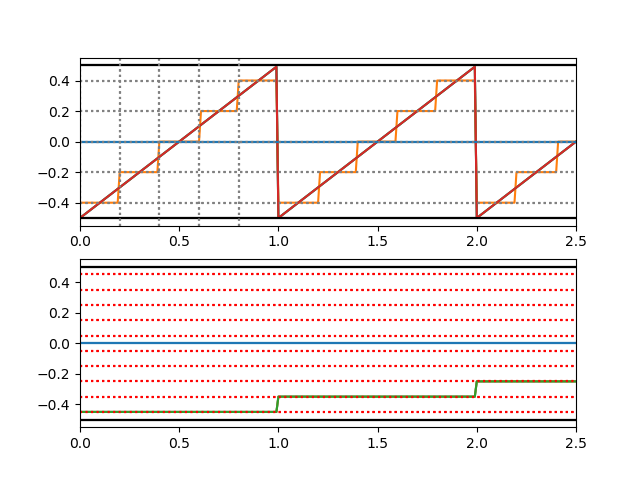

(0, 2.5)

In [57]:
import scipy.signal


plt.subplot(211)
X = scipy.signal.sawtooth(T*2*np.pi/line_time)*0.5*x_span + x_center
plt.plot(T, X)

plt.plot(T, ((T % line_time)//dt/(Nx) - 0.5)*x_span + x_center + dx/2)
plt.axhline(x_center - x_span/2, color="k")
plt.axhline(x_center)
plt.axhline(x_center + x_span/2, color= "k")
#X = scipy.signal.sawtooth(T, width=0.5)
#plt.plot(T, X)
for i in range(Nx):
    plt.axvline(dt*i, color="gray", ls=":")
for j in range(Nx):
    plt.axhline(x_array[j], color="gray", ls=":")

plt.xlim(0, 2.5*Nx*dt)
    
plt.subplot(212)

Y = ((T // line_time)/(Ny)-0.5)*y_span + y_center + dy/2

plt.plot(T, Y)
plt.axhline(y_center - y_span/2, color="k")
plt.axhline(y_center)
plt.axhline(y_center + y_span/2, color= "k")

for j in range(Ny):
    plt.axhline(y_array[j], color="r", ls=":")
plt.xlim(0, 2.5*Nx*dt)


# Add flyback

<IPython.core.display.Javascript object>


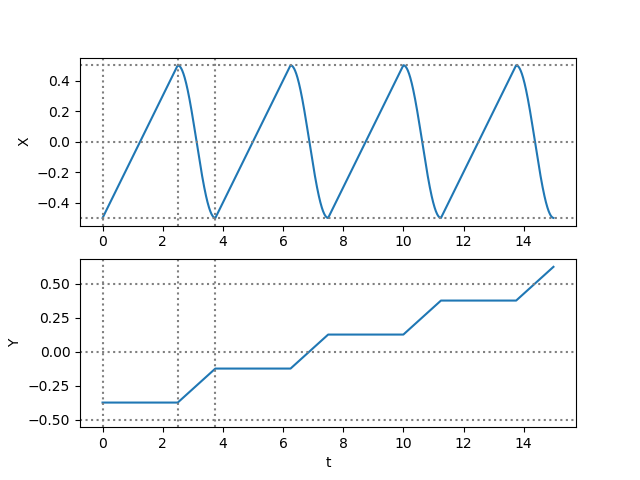

In [103]:
Nx = 5 # pixels per line
Ny = 4 # lines
dt = 0.5 # pixel time
x_span = 1
y_span = 1
x_center = 0
y_center = 0
flyback_ratio = 0.5


dx = x_span/(Nx)
dy = y_span/(Ny)

line_time = dt*Nx
total_line_time = line_time * (1+flyback_ratio)
flyback_time = flyback_ratio*line_time
base_time = 0.01 # time base for analog out

total_time = Ny*total_line_time
T = np.arange(0, total_time, base_time)

x_array = np.arange(x_center-x_span/2 + dx/2, x_center+x_span/2, dx) 
x_array

y_array = np.arange(y_center-y_span/2 + dy/2, y_center+y_span/2, dy) 




def x_linear_ramp(T):
    Tp = T % total_line_time
    return x_center - x_span/2 + dx/dt * Tp
def x_flyback_linear(T):
    Tp = T % total_line_time
    Tfb = Tp - line_time
    return x_center + x_span/2 - dx/dt * Tfb / flyback_ratio

def x_flyback_sin(T):
    Tp = T % total_line_time
    Tfb = Tp - line_time
    return x_center + x_span/2 * np.cos(np.pi*Tfb/flyback_time)

X = np.piecewise(T, 
             condlist=[(T % total_line_time) < line_time,
                       (T % total_line_time) >= line_time ],
             funclist=[x_linear_ramp,
                       x_flyback_sin])


def y_pos(T):
    return ((T // total_line_time)/(Ny)-0.5)*y_span + y_center + dy/2

def y_flyback(T):
    y_start = y_pos(T)
    y_stop  = y_pos(T + dt*Nx)
    
    Tp = T % total_line_time
    Tfb = Tp - line_time
    return y_start + (y_stop-y_start)*Tfb/flyback_time
    

Y = np.piecewise(T, 
             condlist=[(T % total_line_time) < line_time,
                       (T % total_line_time) >= line_time ],
             funclist=[y_pos,
                       y_flyback])

plt.figure()
plt.subplot(211)
plt.plot(T, X)
plt.ylabel("X")

for t in [0, line_time, total_line_time]:
    plt.axvline(t, color="gray", ls=":")
for x in [x_center, x_center-x_span/2, x_center+x_span/2]:
    plt.axhline(x, color="gray", ls=":")

    
plt.subplot(212)
plt.plot(T, Y)
plt.ylabel("Y")
plt.xlabel("t")

for t in [0, line_time, total_line_time]:
    plt.axvline(t, color="gray", ls=":")
for x in [x_center, x_center-x_span/2, x_center+x_span/2]:
    plt.axhline(x, color="gray", ls=":")

    